In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

%matplotlib inline

In [5]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

In [6]:
car_img = cv2.imread(".\\images\\car plate.jpg")

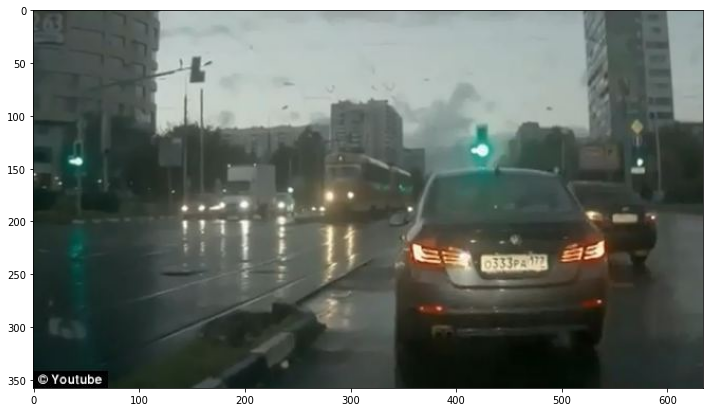

In [7]:
display(car_img)

In [8]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

In [9]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)

    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255), 4)
        
    return plate_img

In [10]:
result = detect_plate(car_img)

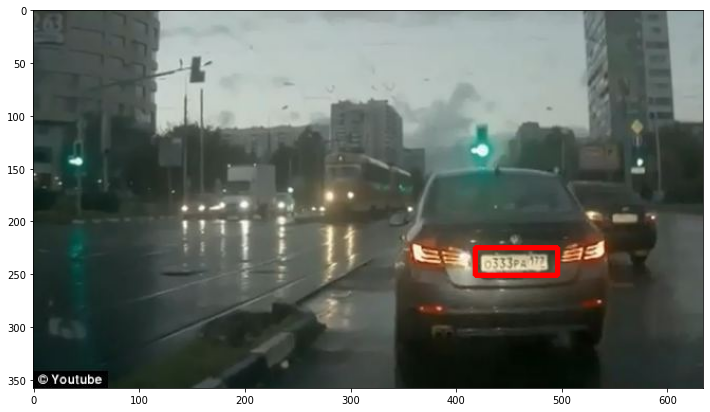

In [11]:
display(result)

In [12]:
img = cv2.imread(".\\images\\car plate.jpg")

In [17]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()

    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)

    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)

        plate_img[y:y+h,x:x+w] = blurred_roi
    return plate_img

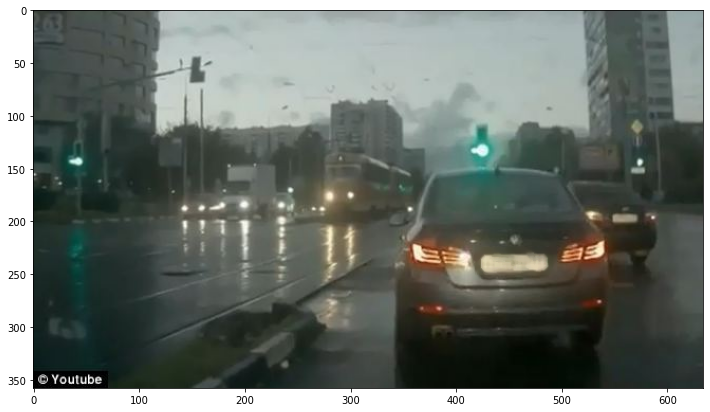

In [18]:
result = detect_and_blur_plate(img)
display(result)